# Data collection

In [ ]:
import os
import platform
# Chose the Operating System
#
OS = platform.system()                                                               # returns 'Windows', 'Linux', etc

if not os.path.exists("./smei_bert_dataset.zip"):
    #os.system('gdown --id "1XzW5NjGD5dwYdhetb8adZMiZzXTYiE-e" --output "./smei_bert_dataset.zip"')  # april, may
    #os.system('gdown --id "1zbpWfRaLQu4ioEu9ixOamrlc3Crr5jZC" --output "./smei_bert_dataset.zip"')  # feb, march
    os.system('gdown --id "1wCMpEdF2TCJHXM4f5G9lm0wFh_-wgmMU" --output "./smei_bert_dataset.zip"')  # jan, feb, march, april, may
    
    if OS == "Linux":
        os.system('unzip -o -n "./smei_bert_dataset.zip" -d "./"')

if not os.path.exists("./smei_bert_libs.zip"):
    os.system('gdown --id "1GKrGZFq3kEHd7OfD4hHCwBqas40zPMG-" --output "./smei_bert_libs.zip"')
    if OS == "Linux":
        os.system('unzip -o -n "./smei_bert_libs.zip" -d "./"')

# Libraries Installation

In [ ]:
os.system('pip install transformers=="3.0.0"')

0

# All Imports

In [ ]:
import timeit
from scipy.stats import spearmanr
from smei_bert_libs.preprocessing import SmeiBertPreprocessing
from smei_bert_libs.utils import print_computation_time_in_days
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch
import pandas as pd
from torch import nn  
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# All Globals

In [ ]:
gpu = torch.cuda.is_available()
print("GPU Available: ", gpu)
file_out_txt = './smei_bert_output.csv'
limit = None
limit_n_days = None
limit_n_tweets_to_classify = False
n_tweets_to_classify = 100
datasetPath = './smei_bert_dataset_2020'
fieldSeparator = ';'
all_encoded_classes = ['-1','0','1']
all_classes = ["Negative", "Neutral", "Positive"]

GPU Available:  True


# Bert Model Definition

In [ ]:
import glob

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("neuraly/bert-base-italian-cased-sentiment")
# Load the model, use .cuda() to load it on the GPU
if gpu is True: 
  model = AutoModelForSequenceClassification.from_pretrained("neuraly/bert-base-italian-cased-sentiment").cuda()
else: 
  model = AutoModelForSequenceClassification.from_pretrained("neuraly/bert-base-italian-cased-sentiment")

def bert_inference(sentence, model):
  input_ids = tokenizer.encode(sentence, add_special_tokens=True)

  # Create tensor, use .cuda() to transfer the tensor to GPU
  if gpu is True: 
    tensor = torch.tensor(input_ids).long().cuda()
  else:
    tensor = torch.tensor(input_ids).long()
    
  # Fake batch dimension
  tensor = tensor.unsqueeze(0)

  # Call the model and get the logits
  logits, = model(tensor)

  # Remove the fake batch dimension
  logits = logits.squeeze(0)

  # The model was trained with a Log Likelyhood + Softmax combined loss, hence to extract probabilities we need a softmax on top of the logits tensor
  proba = nn.functional.softmax(logits, dim=0)

  # Unpack the tensor to obtain negative, neutral and positive probabilities
  negative, neutral, positive = proba

  negative = np.round(float(negative), 3)
  neutral = np.round(float(neutral), 3)
  positive = np.round(float(positive), 3)

  classification = np.argmax([negative, neutral, positive])

  return negative, neutral, positive, classification

Downloading:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/235k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/443M [00:00<?, ?B/s]

# Preprocessing

In [ ]:
start_time = timeit.default_timer()

file_out = open(file_out_txt, 'w')
file_out.write("Current Day, Number of Positives, Number of Neutrals, Number of Negatives, Total Number, Bert Smei Index 1, Positive Probs Sum, Neutrals Probs Sum, Negatives Probs Sum, Total Probs, Bert Smei Insex 2, Normal Smei Number of Positives, Normal Smei Number of Neutrals, Normal Smei Number of Negatives, Normal Smei Total Number, Normal Smei Index 3\n")
file_out.close
i = 0

sbert = SmeiBertPreprocessing(limit)			 # Test the program on a smaller Dataset - True or Full Dataset - False	
dataset = sbert.loadSmeiBertData(dataPath=datasetPath, fieldSeparator = fieldSeparator, limit = limit, limit_n_days = limit_n_days)

end_time = timeit.default_timer()
print("\nPreprocessing Elapsed Time: ", end_time - start_time)


Loading Smei Bert Data from the files...

Smei Bert Data - DataSet Folder : ./smei_bert_dataset_2020
70442 lines read, n. attributes 10: 
92243 lines read, n. attributes 10: 
68725 lines read, n. attributes 10: 
88567 lines read, n. attributes 10: 
83497 lines read, n. attributes 10: 
82666 lines read, n. attributes 10: 
79347 lines read, n. attributes 10: 
87489 lines read, n. attributes 10: 
56988 lines read, n. attributes 10: 
91181 lines read, n. attributes 10: 
77593 lines read, n. attributes 10: 
94485 lines read, n. attributes 10: 
65267 lines read, n. attributes 10: 
76194 lines read, n. attributes 10: 
74460 lines read, n. attributes 10: 
96394 lines read, n. attributes 10: 
59640 lines read, n. attributes 10: 
83091 lines read, n. attributes 10: 
56996 lines read, n. attributes 10: 
85565 lines read, n. attributes 10: 
57429 lines read, n. attributes 10: 
88126 lines read, n. attributes 10: 
86835 lines read, n. attributes 10: 
77783 lines read, n. attributes 10: 
77287 line

In [ ]:
'''
sentences_data = list(dataset[d][1][:,8])[0:500]

print(sentences_data)

bert_negative, bert_neutral, bert_positive, classification = bert_inference(sentences_data, model)
print(bert_negative)
print(bert_neutral)
print(bert_positive)
'''

'\nsentences_data = list(dataset[d][1][:,8])[0:500]\n\nprint(sentences_data)\n\nbert_negative, bert_neutral, bert_positive, classification = bert_inference(sentences_data, model)\nprint(bert_negative)\nprint(bert_neutral)\nprint(bert_positive)\n'

# Main Loop

In [ ]:
start_time = timeit.default_timer()

data_set_smei_bert = []
smei_indexes_list = []
for d in range(len(dataset)):
  bert_sentiment_data = []
  smei_sentiment_data = []
  bert_negative_data = [] 
  bert_neutral_data = []
  bert_positive_data = []
  sentences_data = list(dataset[d][1][:,8])
  smei_sentiments = list(dataset[d][1][:,9])
  current_day = dataset[d][0]

  i = 0
  print(current_day, "  -  ", end = "")
  for s,smei_sent in zip(sentences_data, smei_sentiments):
    try:
      bert_negative, bert_neutral, bert_positive, classification = bert_inference(s, model)
      print('.', end = "")
      bert_sentiment = all_encoded_classes[classification]
      bert_classification = all_classes[classification]
      data_set_smei_bert.append([current_day, bert_sentiment, bert_classification, bert_negative, bert_neutral, bert_positive])
      bert_sentiment_data.append(int(bert_sentiment))
      smei_sentiment_data.append(int(smei_sent))
      bert_negative_data.append(bert_negative)
      bert_neutral_data.append(bert_neutral)
      bert_positive_data.append(bert_positive)
    except ValueError: 
      print("\nError on this Tweet: ", s)

    if limit_n_tweets_to_classify is True: 
      i += 1
      if i > n_tweets_to_classify: 
        break

  n_positives = bert_sentiment_data.count(1)
  n_neutrals = bert_sentiment_data.count(0)
  n_negatives = bert_sentiment_data.count(-1)
  total_cases = n_positives + n_neutrals + n_negatives
  smei_index_1 = (n_positives - n_negatives) / total_cases 

  prob_sum_positives = sum(bert_positive_data)
  prob_sum_neutrals = sum(bert_neutral_data)
  prob_sum_negatives = sum(bert_negative_data)
  total_probs = prob_sum_positives + prob_sum_neutrals + prob_sum_negatives
  smei_index_2 = (prob_sum_positives - prob_sum_negatives) / total_probs 

  n_positives_smei = smei_sentiment_data.count(1)
  n_neutrals_smei = smei_sentiment_data.count(0)
  n_negatives_smei = smei_sentiment_data.count(-1)
  total_cases_smei = n_positives_smei + n_neutrals_smei + n_negatives_smei
  smei_index_3 = (n_positives_smei - n_negatives_smei) / total_cases_smei 

  bert_sentiment_data_count = [current_day, n_positives, n_neutrals, n_negatives, total_cases, smei_index_1, prob_sum_positives, prob_sum_neutrals, prob_sum_negatives, total_probs, smei_index_2, n_positives_smei, n_neutrals_smei, n_negatives_smei, total_cases_smei, smei_index_3]
  smei_indexes_list.append([current_day, smei_index_1, smei_index_2, smei_index_3])
  print("\nProcessing: ",bert_sentiment_data_count)

  file_out = open(file_out_txt, 'a')
  file_out.write(str(current_day) + ',' + str(n_positives) + ',' + str(n_neutrals) + ',' + str(n_negatives) + ',' + str(total_cases) + ',' + str(smei_index_1) + ',' + str(prob_sum_positives) + ',' + str(prob_sum_neutrals) + ',' + str(prob_sum_negatives) + ',' + str(total_probs) + ',' + str(smei_index_2) + ',' + str(n_positives_smei) + ',' + str(n_neutrals_smei) + ',' + str(n_negatives_smei) + ',' + str(total_cases_smei) + ',' + str(smei_index_3) + '\n')
  file_out.close()

end_time = timeit.default_timer()

print("\nIndex Computation Elapsed Time: ", end_time - start_time)

2020-01-01   -  .....................................................................................................
Processing:  ['2020-01-01', 17, 64, 20, 101, -0.0297029702970297, 21.008999999999986, 60.200999999999986, 19.77900000000001, 100.98899999999999, 0.012179544306805451, 27, 50, 24, 101, 0.0297029702970297]
2020-01-02   -  .....................................................................................................
Processing:  ['2020-01-02', 19, 74, 8, 101, 0.10891089108910891, 17.236999999999995, 74.02899999999998, 9.737000000000009, 101.00299999999999, 0.07425522014197584, 29, 46, 26, 101, 0.0297029702970297]
2020-01-03   -  .....................................................................................................
Processing:  ['2020-01-03', 10, 75, 16, 101, -0.0594059405940594, 10.833999999999998, 74.90399999999998, 15.256999999999994, 100.99499999999998, -0.04379424723996235, 27, 52, 22, 101, 0.04950495049504951]
2020-01-04   -  ....................

# Output Loading

In [ ]:
index_data = pd.read_csv(file_out_txt, sep=',', header=None, usecols = [0, 5, 10, 15]).values             # select only the interested columns
print ('%i lines read' % len(index_data))

153 lines read


# Index 1 Plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


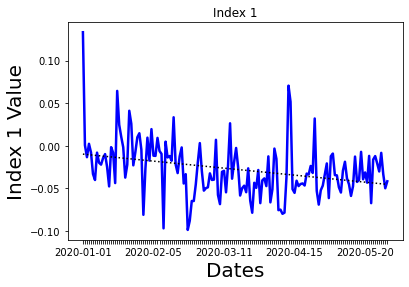

In [ ]:
dates = index_data [1:,0]
index_1 = index_data [1:,1].astype('float')

x = dates
y = index_1

plt.figure()
p = sns.lineplot(x, y, markers=True, color='blue', linewidth=2.5)
p.set(title='Index 1')
p.set_xlabel("Dates", fontsize = 20)
p.set_ylabel("Index 1 Value", fontsize = 20)

for ind, label in enumerate(p.get_xticklabels()):
    if ind % 35 == 0:  # every 14th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

x = list(range(0, len(index_1)))
y = index_1

# fits the best fitting line to the data
plt.plot(np.unique(x), 
         np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='black', ls = ':')

fig = p.get_figure()
fig.savefig("./bert_smei_index_1.jpg") 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


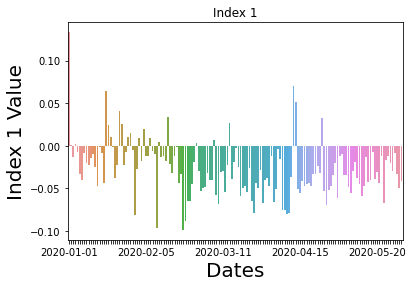

In [ ]:
dates = index_data [1:,0]

x = dates
y = index_1

plot_ = sns.barplot(x, y)
plot_.set(title='Index 1')
plot_.set_xlabel("Dates", fontsize = 20)
plot_.set_ylabel("Index 1 Value", fontsize = 20)

for ind, label in enumerate(plot_.get_xticklabels()):
    if ind % 35 == 0:  # every 14th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

fig = plot_.get_figure()
fig.savefig("./bert_smei_index_1_bar_plots.jpg") 

plt.show()

# Index 2 Plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


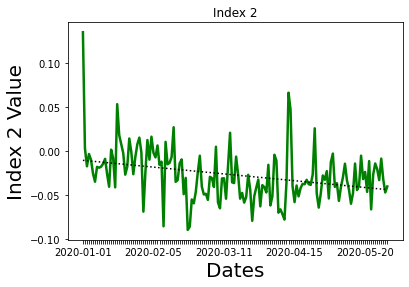

In [ ]:
dates = index_data [1:,0]
index_2 = index_data [1:,2].astype('float')

x = dates
y = index_2

plt.figure()

p = sns.lineplot(x, y, markers=True, color='green', linewidth=2.5)
p.set(title='Index 2')
p.set_xlabel("Dates", fontsize = 20)
p.set_ylabel("Index 2 Value", fontsize = 20)

for ind, label in enumerate(p.get_xticklabels()):
    if ind % 35 == 0:  # every 14th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

x = list(range(0, len(index_2)))
y = index_2

# fits the best fitting line to the data
plt.plot(np.unique(x), 
         np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='black', ls = ':')

fig = p.get_figure()
fig.savefig("./bert_smei_index_2.jpg") 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


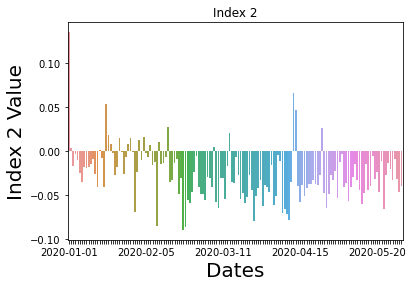

In [ ]:
dates = index_data [1:,0]

x = dates
y = index_2

plot_ = sns.barplot(x, y)
plot_.set(title='Index 2')
plot_.set_xlabel("Dates", fontsize = 20)
plot_.set_ylabel("Index 2 Value", fontsize = 20)

for ind, label in enumerate(plot_.get_xticklabels()):
    if ind % 35 == 0:  # every 14th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

fig = plot_.get_figure()
fig.savefig("./bert_smei_index_2_bar_plots.jpg") 

plt.show()

# Index 3 Plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


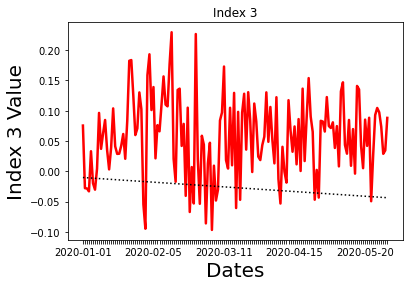

In [ ]:
dates = index_data [1:,0]
index_3 = index_data [1:,3].astype('float')

x = dates
y = index_3

plt.figure()
p = sns.lineplot(x, y, markers=True, color='red', linewidth=2.5)
p.set(title='Index 3')
p.set_xlabel("Dates", fontsize = 20)
p.set_ylabel("Index 3 Value", fontsize = 20)

x = list(range(0, len(index_3)))
y = index_2

for ind, label in enumerate(p.get_xticklabels()):
    if ind % 35 == 0:  # every 14th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

# fits the best fitting line to the data
plt.plot(np.unique(x), 
         np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='black', ls = ':')

fig = p.get_figure()
fig.savefig("./normal_smei_index_3.jpg") 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


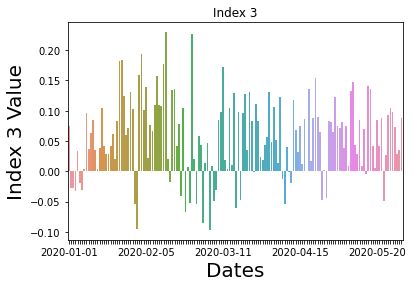

In [ ]:
dates = index_data [1:,0]

x = dates
y = index_3

plot_ = sns.barplot(x, y)
plot_.set(title='Index 3')
plot_.set_xlabel("Dates", fontsize = 20)
plot_.set_ylabel("Index 3 Value", fontsize = 20)

for ind, label in enumerate(plot_.get_xticklabels()):
    if ind % 35 == 0:  # every 14th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

fig = plot_.get_figure()
fig.savefig("./normal_smei_index_3_bar_plots.jpg") 

plt.show()

# Index 1 - Index 2 Correlation

Index 1 - Index 2 Correlation Coefficient:  [[1.         0.97955296]
 [0.97955296 1.        ]]
Spearmans correlation: 0.970


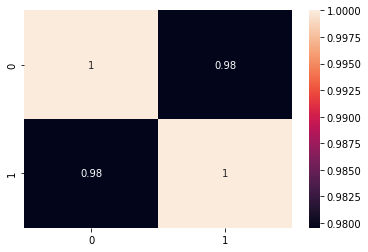

In [ ]:
plt.figure()
corr_c = np.corrcoef(index_1, index_2)
print("Index 1 - Index 2 Correlation Coefficient: ", corr_c)
  
#ploting the heatmap for correlation
ax = sns.heatmap(corr_c, annot=True)
plt.savefig('index_1_index_2_correlation_matrix.jpg')

corr, _ = spearmanr(index_1, index_2)
print('Spearmans correlation: %.3f' % corr)

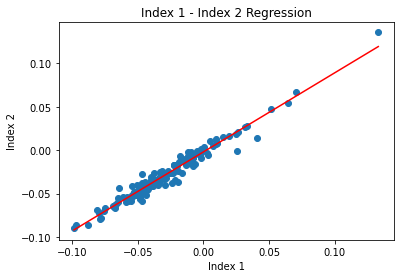

In [ ]:
# adds the title
plt.figure()
plt.title('Index 1 - Index 2 Regression')

x = index_1
y = index_2

# plot the data
plt.scatter(x, y)
  
# fits the best fitting line to the data
plt.plot(np.unique(x), 
         np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')
  
# Labelling axes
plt.xlabel('Index 1')
plt.ylabel('Index 2')

plt.savefig('index_1_index_2_regression_curve.jpg')

# Index 1 - Index 3 Correlation 

Index 1 - Index 3 Correlation Coefficient:  [[1.         0.18594728]
 [0.18594728 1.        ]]
Spearmans correlation: 0.206


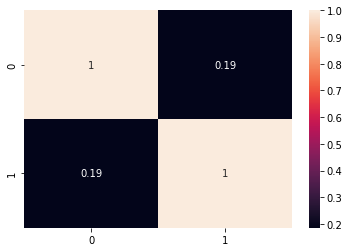

In [ ]:
plt.figure()
corr_c = np.corrcoef(index_1, index_3)
print("Index 1 - Index 3 Correlation Coefficient: ", corr_c)

#ploting the heatmap for correlation
ax = sns.heatmap(corr_c, annot=True)
plt.savefig('index_1_index_3_correlation_matrix.jpg')

corr, _ = spearmanr(index_1, index_3)
print('Spearmans correlation: %.3f' % corr)

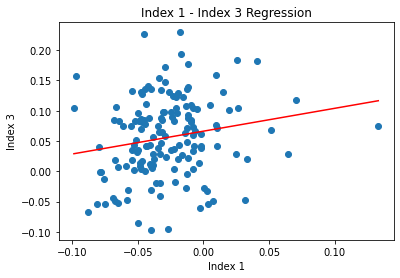

In [ ]:
plt.figure()
# adds the title
plt.title('Index 1 - Index 3 Regression')

x = index_1
y = index_3

# plot the data
plt.scatter(x, y)
  
# fits the best fitting line to the data
plt.plot(np.unique(x), 
         np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')
  
# Labelling axes
plt.xlabel('Index 1')
plt.ylabel('Index 3')

plt.savefig('index_1_index_3_regression_curve.jpg')

# Index 2 - Index 3 Correlation


Index 2 - Index 3 Correlation Coefficient:  [[1.         0.17448586]
 [0.17448586 1.        ]]
Spearmans correlation: 0.196


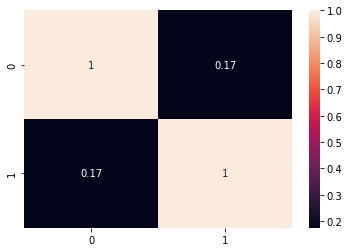

In [ ]:
plt.figure()
corr_c = np.corrcoef(index_2, index_3)
print("Index 2 - Index 3 Correlation Coefficient: ", corr_c)
  
#ploting the heatmap for correlation
ax = sns.heatmap(corr_c, annot=True)
plt.savefig('index_2_index_3_correlation_matrix.jpg')

corr, _ = spearmanr(index_2, index_3)
print('Spearmans correlation: %.3f' % corr)

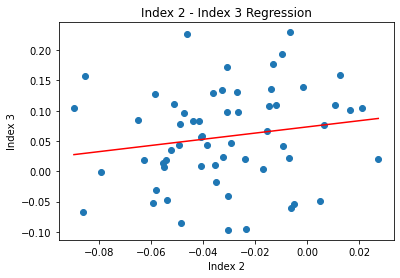

In [ ]:
# adds the title
plt.figure()
plt.title('Index 2 - Index 3 Regression')

x = index_2
y = index_3

# plot the data
plt.scatter(x, y)
  
# fits the best fitting line to the data
plt.plot(np.unique(x), 
         np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')
  
# Labelling axes
plt.xlabel('Index 2')
plt.ylabel('Index 3')

plt.savefig('index_2_index_3_regression_curve.jpg')